# Video Games 


### appendix 

> <a href=#imports>Import Libraries</a>        

> <a href=#webscrabing>Web Scraping</a>

> <a href=#merge>Merging Data</a>

> <a href=#EDA>Explratory Data Analysis (EDA)</a>

> <a href=#LR>Linear Regression</a>

> <a href=#LR>Conclusion</a>


# <a name=imports> Import Libraries</a> 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


# <a name=webscrabing>Web Scraping</a>

### 1.Request to get data form website

In [2]:
url = "https://www.imdb.com/search/title/?title_type=video_game&num_votes=,5000,&sort=user_rating,desc&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=87cca6a7-a16d-42d9-b9de-6aace99ec40a&pf_rd_r=ERFX36S273PQKZHMN3NF&pf_rd_s=center-6&pf_rd_t=60601&pf_rd_i=video-games&ref_=fea_vg_scg_ats_toprated_hd"

response = requests.get(url)
response.status_code

200

### 2.Using BeautifulSoup 

In [3]:
page = response.text

In [4]:
soup = BeautifulSoup(page, "lxml")

In [5]:
#soup.find('div',class_='lister-item mode-advanced')

In [6]:
title = soup.find('h3',class_="lister-item-header").a.text
title

'Wiedzmin 3: Dziki Gon Krew i wino'

In [7]:
year = soup.find('span',class_="lister-item-year text-muted unbold").text.split()[0].replace('(','').replace(')','')
year

'2016'

In [8]:
Gtype = soup.find('p',class_="text-muted").text.strip()
Gtype

'Action, Adventure, Drama'

In [9]:
rate = soup.find('div',class_="ratings-bar").find('strong').text
rate

'9.8'

In [10]:
votes = soup.find('p',class_='sort-num_votes-visible').text.split()[1].replace(',','')
votes

'6818'

### 3.clean data

In [11]:
def clean_num(s):
    """cleans text scraped from website
    
    Parameters:
    s (String): raw text

    Returns:
    String: cleaned digit text

    """ 

    if s is None:
        return s
    return "".join(re.findall('\d*\.?\d+',s))

def get_data(block, tag, class_text):
    """fetch data from tag and its associated class
    
    Parameters:
    block (int): Book item 
    tag (String): tag for element we want to fetch
    class_text (String): class for element we want to fetch

    Returns:
    String: data text fetched

    """ 
    try:
        return block.find(tag, class_ = class_text).text.replace('(','').replace(')','')
    except AttributeError:
        return ""
    return

def get_data_a_tag(i, tag, class_text):    
    try:
        return i.find(tag, class_ = class_text).a.text
    except AttributeError:
        return ""
    return
def get_data_strong_tag(i, tag, class_text):    
    try:
        return i.find(tag, class_ = class_text).strong.text
    except AttributeError:
        return ""
    return
def get_data_descr(i, tag, class_text):    
    try:
        return i.find_all(tag, class_ = class_text)[1].text.strip()
    except AttributeError:
        return ""
    return


def get_data_votes(i, tag, class_text):    
    try:
        return i.find(tag, class_ = class_text).text.split()[1].replace(',','')
    except AttributeError:
        return ""
    return

In [12]:
#Test with the first videio game to ensure functions are working
for i in (soup.find_all('div','lister-item mode-advanced')):
    print(get_data_a_tag(i, "h3","lister-item-header"))
    print(get_data(i, "span", "lister-item-year text-muted unbold"))
    print(get_data(i, "p", "text-muted").strip())
    print(clean_num(get_data_strong_tag(i, "div","ratings-bar")))
    print(get_data_descr(i, "p","text-muted"))
    print(clean_num(get_data_votes(i, "p","sort-num_votes-visible")))

Wiedzmin 3: Dziki Gon Krew i wino
2016 Video Game
Action, Adventure, Drama
9.8
Geralt is in the southern province of Toussaint where a monstrous serial killer is targeting knights with a dark past. Geralt and his old vampire friend investigate the killer's motives.
6818
Red Dead Redemption II
2018 Video Game
Action, Adventure, Crime
9.7
Amidst the decline of the Wild West at the turn of the 20th century, outlaw Arthur Morgan and his gang struggle to cope with the loss of their way of life.
28722
Wiedzmin 3: Dziki Gon
2015 Video Game
banned
|

Action, Adventure, Drama
9.7
A monster hunter for hire embarks on an epic journey to find his former apprentice before The Wild Hunt can capture her and bring about the destruction of the world.
23043
The Last of Us
2013 Video Game
Action, Adventure, Drama
9.7
In a hostile, post-pandemic world, Joel and Ellie, brought together by desperate circumstances, must rely on each other to survive a brutal journey across what remains of the United States.


In [13]:
    print(clean_num(get_data_votes(i, "p","sort-num_votes-visible")))

3196


### 4.store data extacted from website in list

In [14]:
Vgame_list = []

for i in (soup.find_all('div','lister-item mode-advanced')):
    Name = get_data_a_tag(i, "h3","lister-item-header")
    year = get_data(i, "span", "lister-item-year text-muted unbold").split()[0]
    Gtype = get_data(i, "p", "text-muted").strip()
    rate = clean_num(get_data_strong_tag(i, "div","ratings-bar"))
    votes = clean_num(get_data_votes(i, "p","sort-num_votes-visible"))
    
    headers = ['Name', 'year', 'game_type', 'rate','votes']
    Vgame_dict = dict(zip(headers, [ Name,
                                    year,
                                    Gtype,
                                    rate,
                                 
                                    votes]))
    Vgame_list.append(Vgame_dict)


In [15]:
    Vgame_list

[{'Name': 'Wiedzmin 3: Dziki Gon Krew i wino',
  'year': '2016',
  'game_type': 'Action, Adventure, Drama',
  'rate': '9.8',
  'votes': '6818'},
 {'Name': 'Red Dead Redemption II',
  'year': '2018',
  'game_type': 'Action, Adventure, Crime',
  'rate': '9.7',
  'votes': '28722'},
 {'Name': 'Wiedzmin 3: Dziki Gon',
  'year': '2015',
  'game_type': 'banned\n|\n\nAction, Adventure, Drama',
  'rate': '9.7',
  'votes': '23043'},
 {'Name': 'The Last of Us',
  'year': '2013',
  'game_type': 'Action, Adventure, Drama',
  'rate': '9.7',
  'votes': '55725'},
 {'Name': 'Mass Effect: Legendary Edition',
  'year': '2021',
  'game_type': 'Sci-Fi',
  'rate': '9.7',
  'votes': '712'},
 {'Name': 'God of War',
  'year': '2018',
  'game_type': 'Action, Adventure, Drama',
  'rate': '9.6',
  'votes': '21326'},
 {'Name': 'Perusona 5: Za roiyaru',
  'year': '2019',
  'game_type': 'Action, Adventure, Fantasy',
  'rate': '9.6',
  'votes': '799'},
 {'Name': 'Zeruda no densetsu: Toki no okarina',
  'year': '1998'

### 4.use pandas datafram1 to save it in csv file

In [16]:
df = pd.DataFrame(Vgame_list)


In [17]:
df.Name=df.Name.str.lower()
df.head()

,Name,year,game_type,rate,votes
0,wiedzmin 3: dziki gon krew i wino,2016,"Action, Adventure, Drama",9.8,6818
1,red dead redemption ii,2018,"Action, Adventure, Crime",9.7,28722
2,wiedzmin 3: dziki gon,2015,"banned\n|\n\nAction, Adventure, Drama",9.7,23043
3,the last of us,2013,"Action, Adventure, Drama",9.7,55725
4,mass effect: legendary edition,2021,Sci-Fi,9.7,712


In [18]:
df.to_csv('video_game.csv')

### 5.Load the dataframe2

In [19]:
df2=pd.read_csv('vgsales.csv') #data from kaggle 

In [20]:
df2.Name=df.Name.str.lower()
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,wiedzmin 3: dziki gon krew i wino,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,red dead redemption ii,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,wiedzmin 3: dziki gon,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,the last of us,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,mass effect: legendary edition,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 6.merge datafram1(data form website) to datafarme2(data form Kaggle) 


In [21]:
Vgames=df.merge(df2,on='Name')
Vgames

,Name,year,game_type,rate,votes,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,wiedzmin 3: dziki gon krew i wino,2016,"Action, Adventure, Drama",9.8,6818,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,red dead redemption ii,2018,"Action, Adventure, Crime",9.7,28722,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,wiedzmin 3: dziki gon,2015,"banned\n|\n\nAction, Adventure, Drama",9.7,23043,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,the last of us,2013,"Action, Adventure, Drama",9.7,55725,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,mass effect: legendary edition,2021,Sci-Fi,9.7,712,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,god of war,2018,"Action, Adventure, Drama",9.6,21326,6,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,perusona 5: za roiyaru,2019,"Action, Adventure, Fantasy",9.6,799,7,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,zeruda no densetsu: toki no okarina,1998,"Action, Adventure, Fantasy",9.6,9000,8,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,metal gear solid,1998,"Action, Adventure, Drama",9.6,11329,9,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,wiedzmin 3: dziki gon - serca z kamienia,2015,"Action, Adventure, Drama",9.5,5683,10,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [22]:
df3=pd.DataFrame(Vgames)

In [23]:
df3.to_csv('merge_video_game_vgsales.csv')

In [24]:
df3

,Name,year,game_type,rate,votes,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,wiedzmin 3: dziki gon krew i wino,2016,"Action, Adventure, Drama",9.8,6818,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,red dead redemption ii,2018,"Action, Adventure, Crime",9.7,28722,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,wiedzmin 3: dziki gon,2015,"banned\n|\n\nAction, Adventure, Drama",9.7,23043,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,the last of us,2013,"Action, Adventure, Drama",9.7,55725,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,mass effect: legendary edition,2021,Sci-Fi,9.7,712,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,god of war,2018,"Action, Adventure, Drama",9.6,21326,6,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,perusona 5: za roiyaru,2019,"Action, Adventure, Fantasy",9.6,799,7,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,zeruda no densetsu: toki no okarina,1998,"Action, Adventure, Fantasy",9.6,9000,8,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,metal gear solid,1998,"Action, Adventure, Drama",9.6,11329,9,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,wiedzmin 3: dziki gon - serca z kamienia,2015,"Action, Adventure, Drama",9.5,5683,10,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# <a name=EDA>Explratory data analysis(EDA)</a>

In [25]:
 # drop column that we don't use
df3.drop([ 'Platform', 'Year', 'Genre','Publisher'], axis=1, inplace=True)

In [26]:
df.shape

(50, 5)

In [27]:
df3

,Name,year,game_type,rate,votes,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,wiedzmin 3: dziki gon krew i wino,2016,"Action, Adventure, Drama",9.8,6818,1,41.49,29.02,3.77,8.46,82.74
1,red dead redemption ii,2018,"Action, Adventure, Crime",9.7,28722,2,29.08,3.58,6.81,0.77,40.24
2,wiedzmin 3: dziki gon,2015,"banned\n|\n\nAction, Adventure, Drama",9.7,23043,3,15.85,12.88,3.79,3.31,35.82
3,the last of us,2013,"Action, Adventure, Drama",9.7,55725,4,15.75,11.01,3.28,2.96,33.00
4,mass effect: legendary edition,2021,Sci-Fi,9.7,712,5,11.27,8.89,10.22,1.00,31.37
5,god of war,2018,"Action, Adventure, Drama",9.6,21326,6,23.20,2.26,4.22,0.58,30.26
6,perusona 5: za roiyaru,2019,"Action, Adventure, Fantasy",9.6,799,7,11.38,9.23,6.50,2.90,30.01
7,zeruda no densetsu: toki no okarina,1998,"Action, Adventure, Fantasy",9.6,9000,8,14.03,9.20,2.93,2.85,29.02
8,metal gear solid,1998,"Action, Adventure, Drama",9.6,11329,9,14.59,7.06,4.70,2.26,28.62
9,wiedzmin 3: dziki gon - serca z kamienia,2015,"Action, Adventure, Drama",9.5,5683,10,26.93,0.63,0.28,0.47,28.31


In [28]:
# rows 2 & 26 need to modified To clarify Data

In [29]:
df3.loc[2]['game_type']

'banned\n|\n\nAction, Adventure, Drama'

In [30]:
df3.loc[25]['game_type']

'banned\n|\n\nAction, Adventure, Crime'

In [38]:
df3.at[2,'game_type']='Action, Adventure, Drama'
df3.at[25,'game_type']='Action, Adventure, Crime'

In [39]:
df3

,Name,year,game_type,rate,votes,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,wiedzmin 3: dziki gon krew i wino,2016,"Action, Adventure, Drama",9.8,6818,1,41.49,29.02,3.77,8.46,82.74
1,red dead redemption ii,2018,"Action, Adventure, Crime",9.7,28722,2,29.08,3.58,6.81,0.77,40.24
2,wiedzmin 3: dziki gon,2015,"Action, Adventure, Drama",9.7,23043,3,15.85,12.88,3.79,3.31,35.82
3,the last of us,2013,"Action, Adventure, Drama",9.7,55725,4,15.75,11.01,3.28,2.96,33.00
4,mass effect: legendary edition,2021,Sci-Fi,9.7,712,5,11.27,8.89,10.22,1.00,31.37
5,god of war,2018,"Action, Adventure, Drama",9.6,21326,6,23.20,2.26,4.22,0.58,30.26
6,perusona 5: za roiyaru,2019,"Action, Adventure, Fantasy",9.6,799,7,11.38,9.23,6.50,2.90,30.01
7,zeruda no densetsu: toki no okarina,1998,"Action, Adventure, Fantasy",9.6,9000,8,14.03,9.20,2.93,2.85,29.02
8,metal gear solid,1998,"Action, Adventure, Drama",9.6,11329,9,14.59,7.06,4.70,2.26,28.62
9,wiedzmin 3: dziki gon - serca z kamienia,2015,"Action, Adventure, Drama",9.5,5683,10,26.93,0.63,0.28,0.47,28.31


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          50 non-null     object 
 1   year          50 non-null     object 
 2   game_type     50 non-null     object 
 3   rate          50 non-null     object 
 4   votes         50 non-null     object 
 5   Rank          50 non-null     int64  
 6   NA_Sales      50 non-null     float64
 7   EU_Sales      50 non-null     float64
 8   JP_Sales      50 non-null     float64
 9   Other_Sales   50 non-null     float64
 10  Global_Sales  50 non-null     float64
dtypes: float64(5), int64(1), object(5)
memory usage: 6.7+ KB


In [33]:
df3.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,9.829800,5.688400,2.810800,1.894200,20.222800
std,14.57738,7.156443,4.368159,2.366692,1.995781,11.575082
min,1.00000,2.550000,0.010000,0.060000,0.230000,11.330000
25%,13.25000,5.800000,3.460000,0.472500,0.775000,13.472500
50%,25.50000,8.330000,4.515000,2.800000,1.295000,16.000000
75%,37.75000,10.575000,6.840000,4.175000,2.125000,23.005000
max,50.00000,41.490000,29.020000,10.220000,10.570000,82.740000


In [34]:
sum(df.duplicated())

0

In [35]:
#to make sure no missing val in our dataset
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
year - 0%
game_type - 0%
rate - 0%
votes - 0%


In [36]:
#correlation matrix is very helpful when understanding the relationship between the numerical columns>>>اشرح اضافي عشان نفهم
df3.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.685315,-0.524201,-0.451095,-0.224910,-0.752642
NA_Sales,-0.685315,1.000000,0.519829,0.150437,0.254122,0.889022
EU_Sales,-0.524201,0.519829,1.000000,0.194564,0.397974,0.807178
JP_Sales,-0.451095,0.150437,0.194564,1.000000,-0.182604,0.339467
Other_Sales,-0.224910,0.254122,0.397974,-0.182604,1.000000,0.442478
Global_Sales,-0.752642,0.889022,0.807178,0.339467,0.442478,1.000000


<AxesSubplot:>

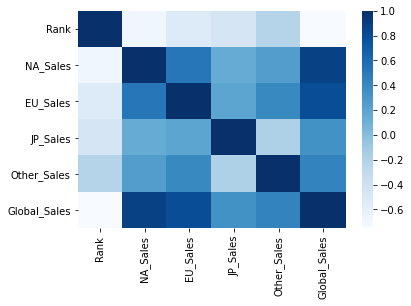

In [37]:
#We can plot the correlation matrix for better understanding

sns.heatmap(df3.corr(), cmap="Blues")